In [1]:
# 새로운 자료구조 2개
# Series, DataFrame

import pandas as pd

In [3]:
path = './학군연습.xlsx'
school_df = pd.read_excel( path )

In [4]:
# 엑셀 => df
# 컬럼(사용할 컬럼 추리기, 컬럼 이름 바꾸기)
# 인덱스
# 데이터값(결측 데이터 처리, 데이터 타입 체크)
# 6가지 기능들
# 시리즈의 연산, 필터링, apply, groupby, pivot + merge

# 데이터 시각화

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# 시각화 기본 폼
plt.figure() # 시작점

# 핵심적인 데이터 시각화
# 다양한 옵션들

plt.show()   # 종료, 마침표

<Figure size 640x480 with 0 Axes>

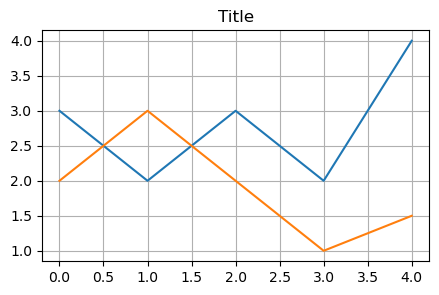

In [15]:
# 아래 코드를 이용해서 시각화를 예쁘게 해줘 - ChatGPT 활용
plt.figure( figsize=(5,3) ) # 시작점

plt.title('Title')
plt.grid(':')

plt.plot( [3,2,3,2,4], label='line 1' )
plt.plot( [2,3,2,1,1.5], label='line 2' )

plt.show()                  # 마침표

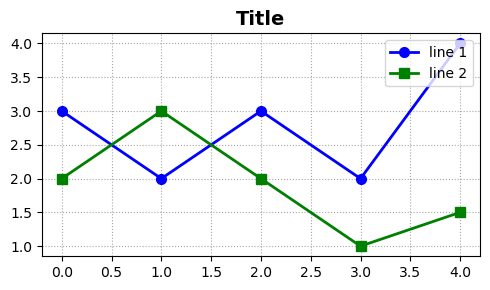

In [16]:
#ChatGPT
# Setting up the figure size
plt.figure(figsize=(5, 3))

# Adding a title and grid to the plot
plt.title('Title', fontsize=14, fontweight='bold')
plt.grid(True, which='both', linestyle=':', color='gray', alpha=0.7)

# Plotting the data for two lines with labels and enhancing the visuals
plt.plot([3, 2, 3, 2, 4], label='line 1', linewidth=2, marker='o', markersize=7, color='b')
plt.plot([2, 3, 2, 1, 1.5], label='line 2', linewidth=2, marker='s', markersize=7, color='g')

# Customizing the legend
plt.legend(loc='upper right', fontsize=10)

# Adjusting layout to prevent clipping
plt.tight_layout()

# Displaying the enhanced plot
plt.show()

## 데이터 시각화 목표
- 우리가 데이터를 분석할 때, 이 데이터를 이해하기 위해서 시각화가 필요함
- 현미경
- 데이터 종류에 따라서 어떻게 시각화하여 데이터를 살펴볼지 정리!

## 데이터 종류
- 연속된 숫자, 카테고리
- 데이터를 활용할 수 있는지 구분을 할 수 있어야함 - ex) school_df['name']은 사용하기 어려운 데이터
- 종류의 구분이 어려운 칼럼의 경우, unique()로 확인해본다 - ex) tip_df['size']의 경우 숫자형 데이터이나, 카테고리형임

In [22]:
tip_df = sns.load_dataset( 'tips' )

tip_df['size'].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

In [23]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# 출처 : https://cafe.naver.com/jkitstudy/184

## 연속된 숫자 데이터
- 데이터의 분포(어디에 몰려있고, 어떻게 퍼져있는지)
- 히스토그램 이용!
- 가운데 솟아있고 좌우로 퍼짐
- 한쪽으로 솟아있고, 한쪽으로 퍼짐

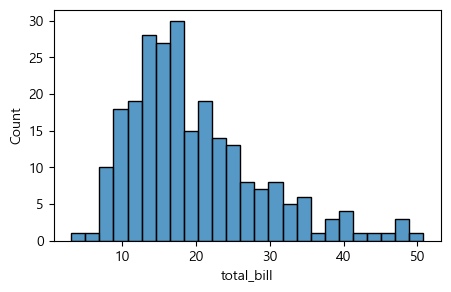

In [31]:
plt.figure(figsize=(5,3))

# plt.hist(tip_df['total_bill'])

sns.histplot( tip_df, x='total_bill', bins=25 )

plt.show()

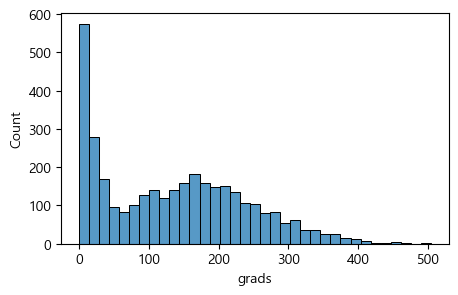

In [32]:
plt.figure(figsize=(5,3))

sns.histplot( school_df, x='grads', bins=35 )

plt.show()

In [33]:
school_df['grads']

0       234
1       172
2       214
3       310
4       256
       ... 
3425    193
3426    298
3427     12
3428     21
3429      9
Name: grads, Length: 3430, dtype: int64

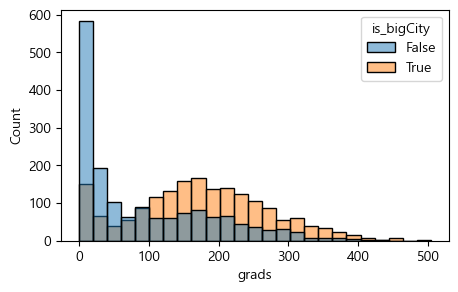

In [63]:
# 광역시 vs 비광역시 졸업생 분포가 다를 것이다
# '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '경기도'

def is_bigCity(x):
    big_list = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '경기도']
    
    if x in big_list:
        return True
    else :
        return False

school_df['is_bigCity'] = school_df['sido'].apply( is_bigCity )

# 광역시만 가져와서 분포를 그려보자!

big_city = school_df[ school_df['is_bigCity'] ]
small_city = school_df[ ~school_df['is_bigCity'] ]

# 그래프 그리기

plt.figure(figsize=(5,3))

sns.histplot(school_df, x='grads', bins=25, hue='is_bigCity') # hue - 그래프의 카테고리 분류(라벨링)

# sns.histplot(big_city, x='grads',bins=25)
# sns.histplot(small_city, x='grads',bins=25)

plt.show()

## 카테고리 데이터
- 카테고리 별 데이터의 개수
- sns의 countplot을 이용

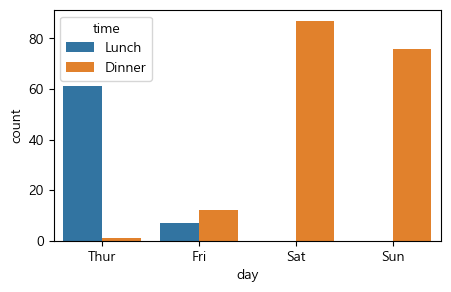

In [66]:
plt.figure(figsize=(5,3))

sns.countplot( tip_df, x='day', hue='time' )

plt.show()

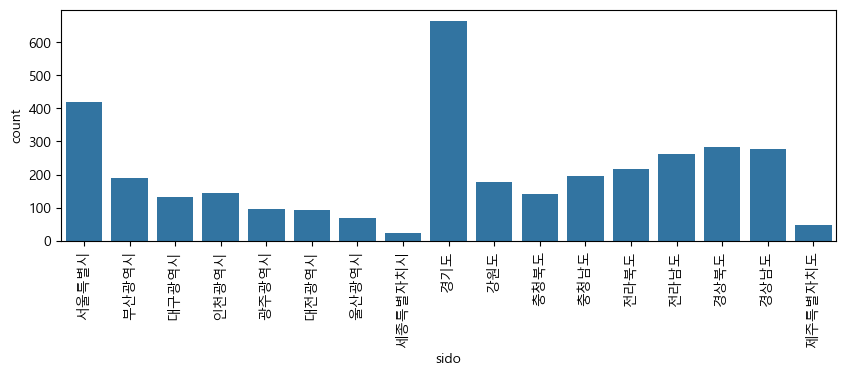

In [69]:
plt.figure(figsize=(10,3))

sns.countplot( school_df, x='sido' )
plt.xticks( rotation=90 )

plt.show()

## 카테고리와 연속된 숫자 데이터의 관계
- 카테고리 별 숫자 데이터의 분포를 확인
- sns의 boxplot, violinplot

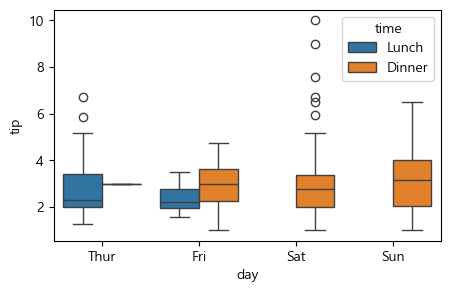

In [73]:
plt.figure(figsize=(5,3))

sns.boxplot( tip_df, x='day', y='tip', hue='time' )

plt.show()

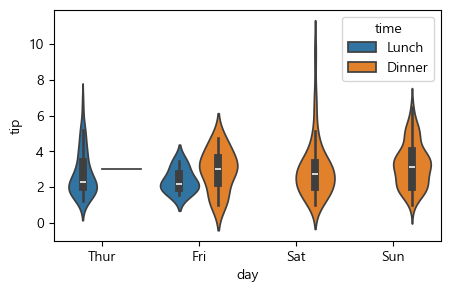

In [75]:
plt.figure(figsize=(5,3))

sns.violinplot( tip_df, x='day', y='tip', hue='time')

plt.show()

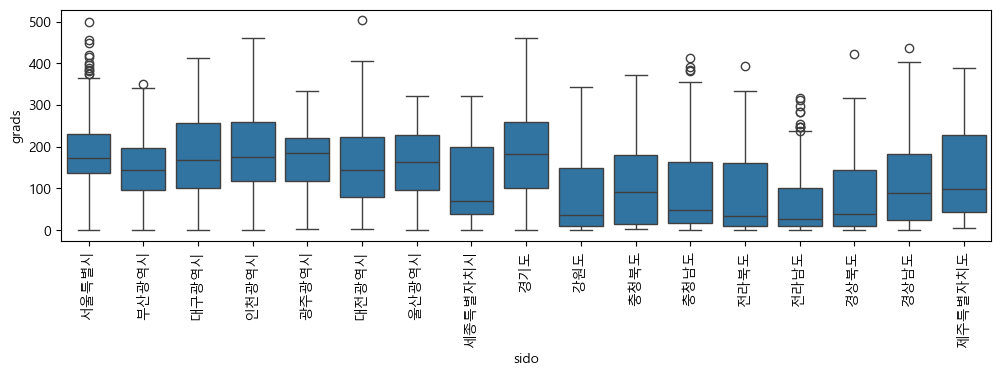

In [81]:
# 시도별 졸업생 분포를 살펴보자!
plt.figure(figsize=(12,3))
plt.xticks(rotation=90)

sns.boxplot( school_df, x='sido', y='grads')

plt.show()

## 숫자와 숫자 데이터 간의 관계
- 2차원 평면위에 두 데이터가 만나는 지점마다 점을 찍어서 데이터가 어떻게 퍼져있는지 살펴 봄
- 산포도(scatter)

In [85]:
# corr
# -1 ~ 1
tip_df.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


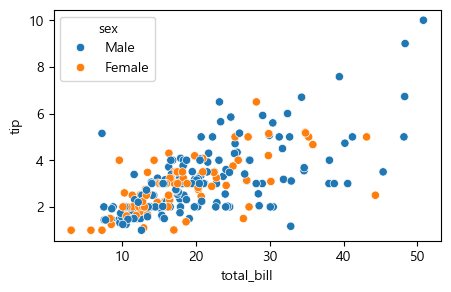

In [87]:
plt.figure(figsize=(5,3))

sns.scatterplot( tip_df, x='total_bill', y='tip', hue='sex' )

plt.show()

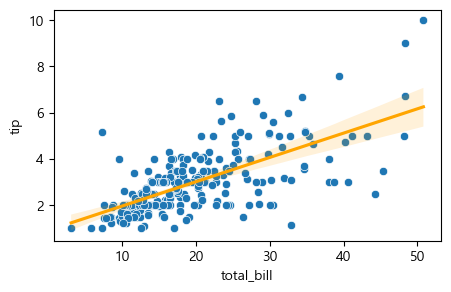

In [94]:
plt.figure(figsize=(5,3))

sns.scatterplot( tip_df, x='total_bill', y='tip')
sns.regplot( tip_df, x='total_bill', y='tip', scatter=False, color='orange') # 회귀선을 확인하고 싶을 시

plt.show()

# 머신러닝
## 머신러닝 입문
- 사이킷런
- 사용법
    1. 모델 생성
    2. 모델 훈련
    3. 예측, 검증

In [96]:
iris_df = sns.load_dataset('iris')

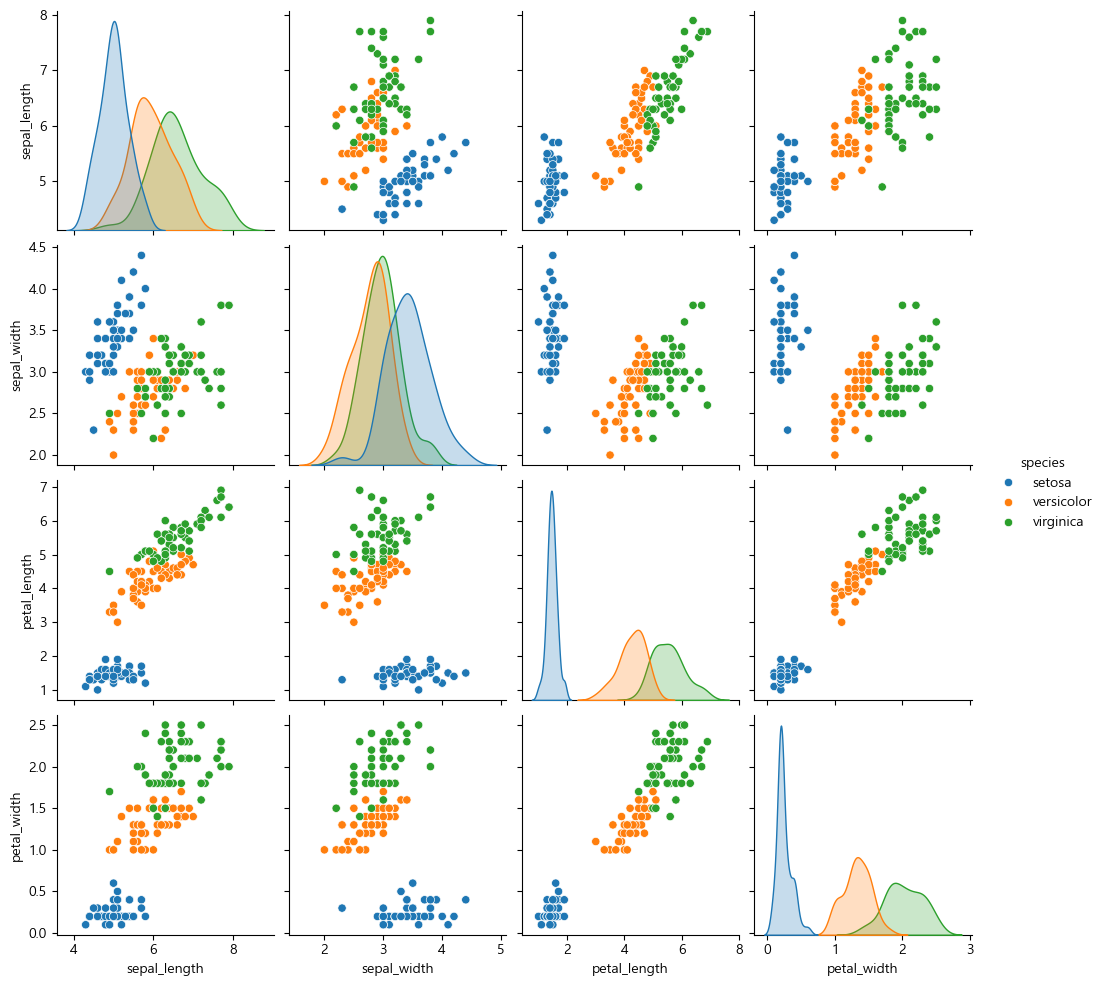

In [99]:
sns.pairplot(iris_df, hue='species')   # 자동으로 히스토그램과 산포도 출력(독립변수가 숫자형일 때 유용함)

plt.show()

## KNN
(K nearest neighbors)

- 새로운 데이터
- 기존의 데이터와 거리를 다 계산
- 거리로 정렬
- 짧은 거 K개 가져옴
- 다수결

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
# 1. 모델 생성
knn = KNeighborsClassifier()

In [107]:
# 2. 모델 훈련
# 데이터를 feature // target으로 나누어서 넣어줘야 함
# target : 1차원 (Series)
# feature : 2차원 (DataFrame)

y = iris_df[ 'species' ]  # target
X = iris_df.iloc[ : , : -1 ]

knn.fit(X,y)

KNeighborsClassifier()

In [108]:
# 3. 예측, 검증
knn.predict( [[5.0, 3.3, 1.5, 0.25]] ) # feature는 2차원으로

c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [126]:
# 섞어서 훈련용 데이터 // 검증용 데이터
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split( X, y, 
                                                      test_size=0.2, 
                                                      random_state=3, 
                                                      stratify=y )      # stratify : 원본 비율대로 target 데이터의 카테고리를 분류

In [127]:
# 1. 모델 생성
knn = KNeighborsClassifier()

# 2. 모델 훈련
knn.fit( train_x, train_y )

KNeighborsClassifier()

In [128]:
# 3. 검증
# knn.predict( valid_x ) == valid_y
knn.score( valid_x, valid_y )

0.9333333333333333

## 하이퍼 파라미터 세팅
- 모델 별로 사용자가 정해줘야 하는 파라미터
- 데이터에 얼마나 강하게 피팅할 것인지 결정해 줌
    - 오버피팅과 언더피팅 사이의 적절한 모델을 선택해 줌
- 교차검증을 이용
    - 교차검증
    검증용 데이터를 최적의 하이퍼 파라미터 값을 찾는데 사용하기엔 데이터 양이 부족하므로,<br>
    훈련용 데이터 중 하이퍼 파라미터 검증을 위한 데이터를 임의로 구분한다
    - 예시
    만약 데이터가 100개 있다면, 교차검증에서는 20개씩 5개의 그룹으로 나누어서 1번 그룹을 테스트, 나머지 80개로 훈련<br>
     -> 2번 그룹을 테스트, 나머지 80개로 훈련 이런 식으로 5번 반복합니다. 그리고 각각의 테스트 결과를 평균내어 성능을 평가합니다.

In [ ]:
# 에시
## knn
### k의 값이 무한대로 설정되어 최빈도값으로 잘못 예측하는 경우 - underfitting
### k의 값이 너무 최소 값으로 설정되어 예측이 잘못된 경우 - overfitting

In [129]:
from sklearn.model_selection import cross_val_score

In [131]:
# k => 3, 13
knn_3 = KNeighborsClassifier(n_neighbors=3)
cross_val_score( knn_3, train_x, train_y, cv=4 ).mean()  # cv값은 전체 훈련데이터를 몇 그룹으로 구분할지 설정하는 값 : 현재 모델에서는 120개중 30개씩으로 그룹

0.975

In [134]:
# k => 3, 13
knn_13 = KNeighborsClassifier(n_neighbors=13)
cross_val_score( knn_13, train_x, train_y, cv=4 ).mean()

0.9833333333333334

In [135]:
# K에 따라 검증 점수 실험
score_list = []
for k in range(1, 31):
    knn = KNeighborsClassifier( n_neighbors=k )
    score = cross_val_score( knn, train_x, train_y, cv=4 ).mean()
    score_list.append(score)

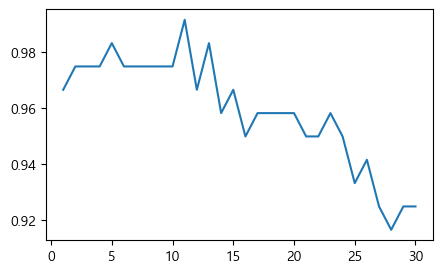

In [137]:
plt.figure(figsize=(5,3))

plt.plot( range(1,31), score_list )

plt.show()

위의 모델은 하이퍼 파라미터의 값을 설정하는 데 큰 의미가 없음 - 정확도가 0.9 이상이므로 <br>
--> 모델을 학습하는 데이터가 너무 완벽한 상태이기 때문<br>
--> 1. 독립변수가 모두 숫자형임<br>
--> 2. 독립변수의 데이터 단위가 비슷한 상태임(데이터의 정규화가 필요 없는 상태)

==> 모델의 학습 과정에서는 feature engineering이 가장 중요하나, 위 모델은 필요없는 상태였기 때문에 정확도가 높게 나옴<br>
정확도를 높이기 위해서는 feature engineering이 가장 중요

In [141]:
# 0. EDA
# 1. feature engineering(인코딩, 스케일링)
# 2. 모델 생성 (하이퍼 파라미터 세팅)
# 3. 훈련
# 4. 예측, 검증

In [142]:
# 카테고리 변수의 숫자화
# 데이터의 정규화

# 실습 - 타이타닉 생존율 에측

In [145]:
path_train = r'C:\Users\user\Desktop\실습 데이터\캐글 타이타닉\train.csv'
path_test = r'C:\Users\user\Desktop\실습 데이터\캐글 타이타닉\test.csv'

train_df = pd.read_csv(path_train)
test_df = pd.read_csv(path_test)

In [146]:
train_df[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [148]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [147]:
test_df[:3]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


## EDA

In [150]:
train_df.isna().sum() / len(train_df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [151]:
test_df.isna().sum() / len(test_df) * 100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [152]:
# fare, embarked <= 가볍게
# Age <= 열심히
# Cabin <= 버림

### 결측 데이터 채우기
#### 1. Embarked

In [155]:
# 필터링을 이용해서 결측 데이터 눈으로 확인
train_df[train_df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


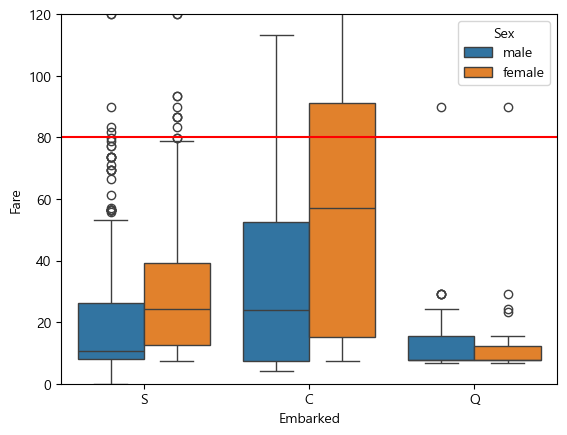

In [168]:
# 카테고리형 데이터의 결측값을 채울 때 : 1. 최빈값 사용
plt.figure()

# sns.countplot( train_df, x='Embarked' ) # 최빈값 확인
sns.boxplot( train_df, x='Embarked', y='Fare', hue='Sex') # Embarked와 연관있는 데이터 확인, Fare 활용
plt.ylim([0,120])
plt.axhline( 80, color='red' )

plt.show()

In [172]:
# Embarked의 결측 데이터를 C로 채우자!
# .loc[ 조건, 컬럼 ]

train_df.loc[ train_df['Embarked'].isna() , 'Embarked' ] = 'C'

#### 2. Fare

In [192]:
test_df[ test_df['Fare'].isna() ]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


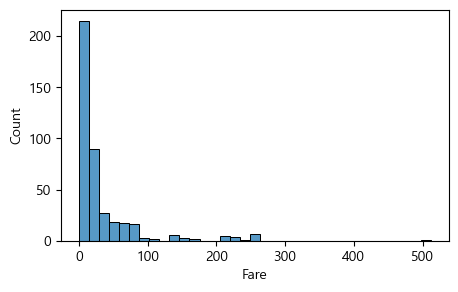

In [176]:
# 1. 숫자형 데이터의 경우 결측값을 채울 때 평균값을 활용
# 2. 히스토그램으로 데이터의 분포를 확인 - 한쪽으로 치우친 경우 평균보단 중앙값을 활용
plt.figure(figsize=(5,3))

sns.histplot( test_df, x='Fare', bins=35 )

plt.show()

In [193]:
test_df['Fare'].median()

14.4542

In [194]:
test_df['Fare'].mean()

35.627188489208635

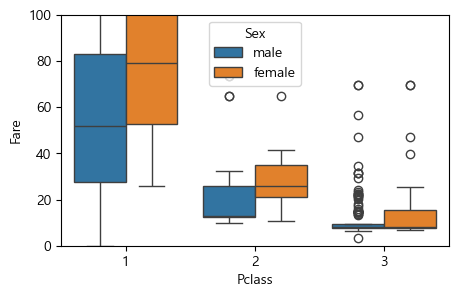

In [182]:
# 세부적으로 결측값 채우기 분석
# pclass와 연관이 있는지 확인
plt.figure(figsize=(5,3))

sns.boxplot(test_df, x='Pclass', y='Fare', hue='Sex')
plt.ylim([0,100])

plt.show()

In [197]:
# 3클래스, 남성의 Fare 중간값
train_df.groupby( ['Pclass', 'Sex'] )['Fare'].median()

Pclass  Sex   
1       female    82.66455
        male      41.26250
2       female    22.00000
        male      13.00000
3       female    12.47500
        male       7.92500
Name: Fare, dtype: float64

In [195]:
test_df.loc[ test_df['Fare'].isna(), 'Fare' ] = 7.925

#### 3. Age

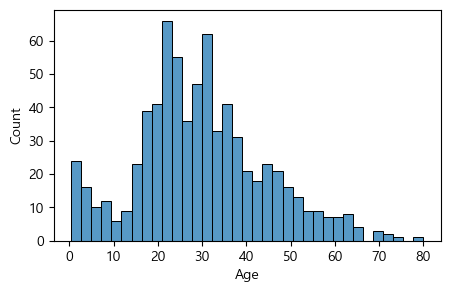

In [203]:
# Age의 경우 가운데가 솟아있고 양쪽으로 균일하게 분포되므로, 평균값으로 결측값을 채움
plt.figure(figsize=(5,3))

sns.histplot(train_df, x='Age', bins=35)

plt.show()

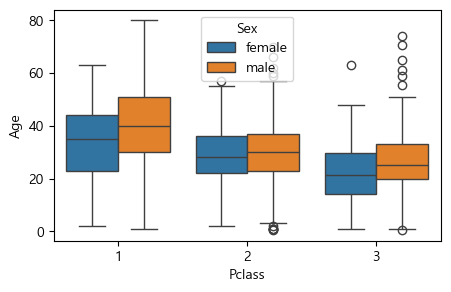

In [211]:
# 세부적으로 확인하기 위해 Age와 연관이 있는 항목을 탐색 - Pclass와 Sex
plt.figure(figsize=(5,3))

sns.boxplot(train_df, x='Pclass', y='Age', hue='Sex')

plt.show()

In [214]:
# Pclass와 Sex 별에 따라 평균 나이를 게산
temp = train_df.groupby(['Pclass', 'Sex'])['Age'].mean()

In [225]:
# groupby 결과값의 인덱스 값으로 for문 실행

for val in temp.index:
    cond1 = train_df['Age'].isna()
    cond2 = train_df['Pclass'] == val[0]
    cond3 = train_df['Sex'] == val[1]
    train_df.loc[ cond1 & cond2 & cond3, 'Age' ] = temp[ val ]

    cond1 = test_df['Age'].isna()
    cond2 = test_df['Pclass'] == val[0]
    cond3 = test_df['Sex'] == val[1]
    test_df.loc[ cond1 & cond2 & cond3, 'Age' ] = temp[ val ]

## Feature Engineering
- 사람에 가까운 데이터를 컴퓨터가 이해하기 좋게 가공하기
- 카테고리도 아니고 숫자도 아닌 것들에서 데이터를 추출
- 인코딩(문자 => 숫자)
- 스케일링

### 1. Name

In [236]:
# split
# 'Braund, Mr. Owen Harris'.split(', ')[1].split('.')[0]
def get_name(x):
    return x.split(', ')[1].split('.')[0]

train_df['Name2'] = train_df['Name'].apply(get_name)

In [237]:
train_df['Name2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

- 원핫인코딩
    - 카테고리 데이터를 숫자형으로 변환 시 사용
    - 데이터의 개수는 같으나, 칼럼(feature)의 개수가 증가 ==> 차원의 저주 : 모델의 성능이 안좋아짐(공백의 영향)
    ==> 차원의 축소 필요

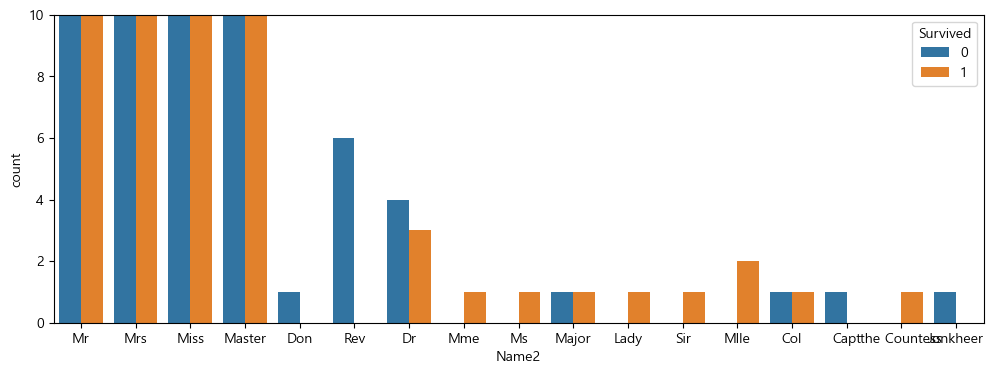

In [243]:
plt.figure(figsize=(12,4))

sns.countplot( train_df, x='Name2', hue='Survived')
plt.ylim([0,10])

plt.show()

In [247]:
# 일반남자, 여자, 신분높은남자, 직업인들
# 'Mr' => 'Mr'
# 'Mrs', 'Miss', 'Mme', 'Ms', 'Lady', 'Mlle' => 'Woman'
# 'Master' => 'Master'
# 나머지 => 'Etc'

def get_nameCategory(x):
    if x == 'Mr':
        return 'Mr'
    elif x == 'Master':
        return 'Master'
    elif x in ['Mrs', 'Miss', 'Mme', 'Ms', 'Lady', 'Mlle']:
        return 'Woman'
    else:
        return 'Etc'

# train_df['Name2'].unique()

train_df['Name_c'] = train_df['Name2'].apply(get_nameCategory)

In [248]:
train_df['Name_c'].unique()

array(['Mr', 'Woman', 'Master', 'Etc'], dtype=object)

In [249]:
# test 셋에도 똑같이 적용
test_df['Name2'] = test_df['Name'].apply(get_name)
test_df['Name_c'] = test_df['Name2'].apply(get_nameCategory)

### 2. Family

In [252]:
train_df['Family'] = train_df['Parch'] + train_df['SibSp']

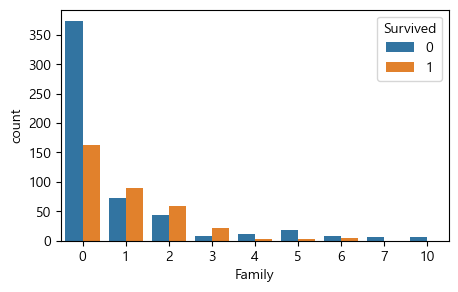

In [255]:
plt.figure(figsize=(5,3))

sns.countplot(train_df, x='Family', hue='Survived')

plt.show()

In [256]:
def get_familyCategory(x):
    if x == 0:
        return 'Alone'
    elif x in [1,2,3]:
        return 'Small_f'
    else:
        return 'Big_f'

train_df['Family_c'] = train_df['Family'].apply(get_familyCategory)

In [257]:
# test 셋에도 적용
test_df['Family'] = test_df['Parch'] + test_df['SibSp']

test_df['Family_c'] = test_df['Family'].apply(get_familyCategory)

### 3. 스케일링
- 표준화 스케일링
    - 평균으로 빼서 편차로 나누어 줌
- 아웃라이어가 있으면 스케일링에 나쁜 영향 => 처리부터하고
     - 아웃라이어 : 히스토그램으로 확인 시 데이터의 분포가 한쪽으로 치우친 경우,<br>
     우측이나 좌측의 데이터는 표준화에 방해가 되는 데이터이므로 처리가 필요함 => log 변환 사용

In [265]:
# Fare의 경우 한쪽으로 치우친 분포의 히스토그램 형태가 나오기 때문에 표준화 전 로그 변환 후 스케일링 진행
# 오른쪽의 값이 너무 커서 데이터의 영향을 줄 수 있기 때문에(아웃라이어)
# Fare log 변환
import numpy as np

# np.log(train_df['Fare'] + 1) # log 사용시 x값이 0이 있으면 경고 발생 -> +1 필요 ==> log1p
train_df['Fare_log'] = np.log1p( train_df['Fare'] )

In [268]:
# 일괄적으로 숫자 데이터들을 스케일링 하기
# ex) (train_df['Age'] - train_df['Age'].mean()) / train_df['Age'].std()
# 1. 스케일러를 만들기
# 2. 데이터를 넣고 훈련
# 3. 실제로 스케일링을 수행

from sklearn.preprocessing import StandardScaler

In [273]:
# 1. 스케일러를 만들기
standard_sc = StandardScaler()
# 2. 데이터를 넣고 훈련
standard_sc.fit( train_df[['Age', 'Fare_log']] )
# 3. 실제로 스케일링을 수행
train_df[ ['Age_s', 'Fare_s'] ] = standard_sc.transform( train_df[['Age', 'Fare_log']] )

In [275]:
# test에도
test_df['Fare_log'] = np.log1p( test_df['Fare'] )
test_df[ ['Age_s', 'Fare_s'] ] = standard_sc.transform( test_df[['Age', 'Fare_log']] )

### 4. 인코딩
- 카테고리 => 숫자

In [279]:
cate_cols = ['Pclass','Sex', 'Embarked', 'Name_c', 'Family_c']

train_final = pd.get_dummies( train_df, columns=cate_cols, dtype='int', drop_first=True) # feature의 개수를 줄일수록 모델 성능에 좋기 때문에 drop_first=True로 적용
test_final = pd.get_dummies( test_df, columns=cate_cols, dtype='int', drop_first=True)

In [281]:
# 스케일링 => 인코딩

feature_names = ['Age_s', 'Fare_s',
                'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S',
                'Name_c_Master', 'Name_c_Mr', 'Name_c_Woman', 'Family_c_Big_f',
                'Family_c_Small_f']

train_final[feature_names]

,Age_s,Fare_s,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Name_c_Master,Name_c_Mr,Name_c_Woman,Family_c_Big_f,Family_c_Small_f
0,-0.551366,-0.879741,0,1,1,0,1,0,1,0,0,1
1,0.654030,1.361220,0,0,0,0,0,0,0,1,0,1
2,-0.250017,-0.798540,0,1,0,0,1,0,0,1,0,0
3,0.428018,1.062038,0,0,0,0,1,0,0,1,0,1
4,0.428018,-0.784179,0,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.174680,-0.333698,1,0,1,0,1,0,0,0,0,0
887,-0.777378,0.487082,0,0,0,0,1,0,0,1,0,0
888,-0.570201,0.242007,0,1,0,0,1,0,0,1,0,1
889,-0.250017,0.487082,0,0,1,0,0,0,1,0,0,0


In [283]:
train_final.to_csv(r'train_final.csv', index=False)
test_final.to_csv(r'test_final.csv', index=False)